In [1]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [2]:
models = '../../models'

In [3]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [4]:
grid_results = fitted_model.cv_results_

In [5]:
grid_results

{'mean_fit_time': array([242.5252408 , 279.68306551, 352.78456216, 285.91091461,
        301.42264256, 308.67977605, 228.98114982, 229.82982955,
        218.77256241]),
 'std_fit_time': array([ 4.53662625, 20.41390568,  1.35571112,  7.95668988, 22.28632082,
         6.52555176, 10.11794991,  7.36670674, 18.15691612]),
 'mean_score_time': array([ 7.63462996, 10.69622364, 26.58181229,  7.90773678, 10.41849942,
        21.815516  ,  4.53748612,  5.15568471,  8.63598275]),
 'std_score_time': array([0.16006889, 0.82618107, 6.28696678, 1.46602527, 0.4376042 ,
        3.90853947, 1.48428077, 0.84746813, 2.15071833]),
 'param_clf__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_clf__max_depth': masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4],
              mask=[False, False, False, False, Fal

In [6]:
AUC = grid_results['mean_test_score']

learning_rate


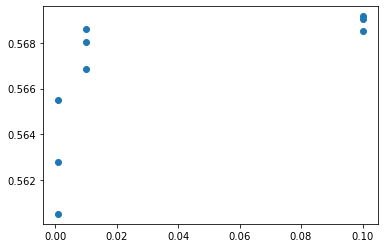

max_depth


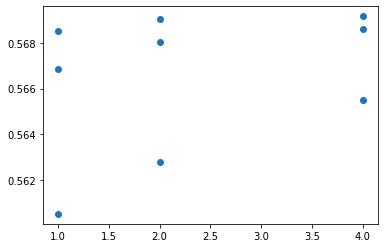

{'learning_rate': array([0.1  , 0.1  , 0.1  , 0.01 , 0.01 , 0.01 , 0.001, 0.001, 0.001]),
 'max_depth': array([1., 2., 4., 1., 2., 4., 1., 2., 4.])}

In [7]:
param_dict = {}
for key, value in grid_results.items():
    if 'param_clf__' in key:
        name = key.replace('param_clf__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()
    elif 'poly__' in key:
        name = key.replace('poly__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()

param_dict

In [8]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.569179 using {'clf__learning_rate': 0.1, 'clf__max_depth': 4}


In [68]:
fitted_model.cv_results_

{'mean_fit_time': array([136.45275722]),
 'std_fit_time': array([1.02516811]),
 'mean_score_time': array([5.06718493]),
 'std_score_time': array([0.20019957]),
 'param_clf__learning_rate': masked_array(data=[0.01],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_clf__max_depth': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__learning_rate': 0.01, 'clf__max_depth': 2}],
 'split0_test_score': array([0.56930559]),
 'split1_test_score': array([0.5671583]),
 'split2_test_score': array([0.56646904]),
 'split3_test_score': array([0.56936017]),
 'split4_test_score': array([0.5680666]),
 'mean_test_score': array([0.56807194]),
 'std_test_score': array([0.00114765]),
 'rank_test_score': array([1], dtype=int32)}

In [59]:
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
# alphas = np.ma.getdata(grid_results['param_clf__alpha'])
# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

In [11]:
log_rates =np.log(rates)

NameError: name 'rates' is not defined

In [12]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

NameError: name 'log_rates' is not defined

In [13]:
df.columns = ['log_rates', 'dims', 'auc']

NameError: name 'df' is not defined

NameError: name 'df' is not defined

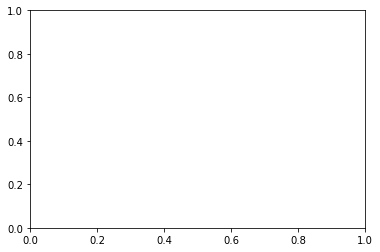

In [14]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

In [15]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

NameError: name 'alphas' is not defined

In [16]:
plt.scatter(log_rates, AUC)

NameError: name 'log_rates' is not defined

In [17]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined